In [1]:
%matplotlib inline

import yt
import cgs as cgs
import numpy as np
import matplotlib.pyplot as plt

import dwarf as dw
import copy

using cgs py


In [2]:
ds = yt.load('./../../flash_runs/carina_final/lowres/dwarf_fullp_hdf5_plt_cnt_0000')
sp = ds.sphere(np.array([2.0,2.0,2.0])*yt.units.kpc, 500*yt.units.pc)


yt : [INFO     ] 2015-04-11 15:41:05,780 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-04-11 15:41:05,815 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-04-11 15:41:05,815 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-04-11 15:41:05,816 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-04-11 15:41:05,817 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-04-11 15:41:05,817 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-04-11 15:41:07,889 Loading field plugins.
yt : [INFO     ] 2015-04-11 15:41:07,891 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-04-11 15:41:07,892 Loaded astro (15 new fields)
yt : [INFO     ] 2015-04-11 15:41:07,892 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-04-11 15:41:07,893 Loaded fluid (62 new fields)
yt : [INFO  

In [3]:
prof = yt.Profile1D(sp, 'radius', 10, 0.0*yt.units.pc, sp.radius,x_log=False)

In [4]:
prof.add_fields('density')

In [5]:
prof.field_data[('gas','density')]


YTArray([  0.00000000e+00,   1.76294150e-28,   5.28882451e-28,
         7.05176601e-28,   1.58664735e-27,   2.64441225e-27,
         2.11552980e-27,   4.93623621e-27,   5.81770696e-27,
         4.93623621e-27]) g/cm**3

In [6]:
prof.field_data.has_key(('gas','density'))

True

In [7]:
prof.x

YTArray([  7.71419395e+19,   2.31425819e+20,   3.85709698e+20,
         5.39993577e+20,   6.94277456e+20,   8.48561335e+20,
         1.00284521e+21,   1.15712909e+21,   1.31141297e+21,
         1.46569685e+21]) cm

In [8]:
%%capture
sim = dw.simulation('dwarf_fullp_hdf5',ds_dir='./../../flash_runs/carina_final/lowres/test/')

yt : [INFO     ] 2015-04-11 15:41:10,295 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-04-11 15:41:10,318 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-04-11 15:41:10,318 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-04-11 15:41:10,319 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-04-11 15:41:10,320 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-04-11 15:41:10,320 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-04-11 15:41:12,615 Loading field plugins.
yt : [INFO     ] 2015-04-11 15:41:12,616 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-04-11 15:41:12,617 Loaded astro (15 new fields)
yt : [INFO     ] 2015-04-11 15:41:12,618 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-04-11 15:41:12,619 Loaded fluid (62 new fields)
yt : [INFO  

In [9]:
dw.profile_1D(sim,'radius','density',20)

yt : [INFO     ] 2015-04-11 15:41:22,011 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-04-11 15:41:22,012 integer runtime parameter particlefilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-04-11 15:41:22,013 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-04-11 15:41:22,035 Parameters: current_time              = 3.16759414307e+13
yt : [INFO     ] 2015-04-11 15:41:22,035 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-04-11 15:41:22,036 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-04-11 15:41:22,036 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-04-11 15:41:22,037 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-04-11 15:41:25,194 Loading field plugins.
yt : [INFO     ] 2015-04-11 

In [10]:
dens_prof = copy.deepcopy(sim.profiles['radius']['density'])
for i in np.arange(len(dens_prof)):
    dens_prof[i] = dens_prof[i].value


In [11]:
times     = sim.times['plt'].convert_to_units('Myr').value

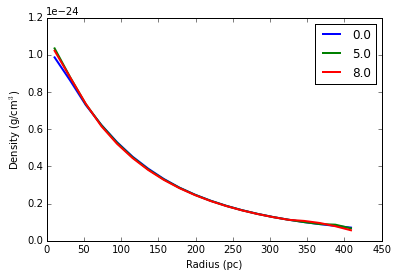

In [14]:
for i in [0,5,9]:
    plt.plot(sim.profile_bins['radius'].convert_to_units('pc').value,dens_prof[i],lw=2,label='%.1f'%(times[i]))
#plt.semilogy()
plt.ylabel(r'Density (g/cm$^{3}$)')
plt.xlabel(r'Radius (pc)')
plt.legend(loc='best')